In [1]:
%cd /content/drive/MyDrive/THDL/Tuan06_Semention_RNN

/content/drive/MyDrive/THDL/Tuan06_Semention_RNN


In [2]:
!unzip "/content/drive/MyDrive/THDL/Tuan06_Semention_RNN/customer_feeback.zip" -d "dataset"

Archive:  /content/drive/MyDrive/THDL/Tuan06_Semention_RNN/customer_feeback.zip
replace dataset/sentiment-analysis.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
!pip install --force-reinstall gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstall

In [2]:
import pandas as pd
import re
import numpy as np
import nltk
import tensorflow as tf
import gensim.downloader as api
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional, GRU
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/THDL/Tuan06_Semention_RNN/dataset/Dataset_Sentiment_Updated.csv')

In [4]:
import pandas as pd

df_test = pd.read_csv('/content/drive/MyDrive/THDL/Tuan06_Semention_RNN/dataset/sentiment-analysis.csv', header=None)

df_test = df_test[0].str.split(',', expand=True)

df_test.columns = ['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']

df_test.drop(0,inplace=True)



In [5]:
df_train.head()

,Cleaned_Summary,Label,Sentiment
0,great cooler excellent air flow and for this p...,1,positive
1,best budget 2 fit cooler nice cooling,1,positive
2,the quality is good but the power of air is de...,1,positive
3,very bad product its a only a fan,0,negative
4,the cooler is really fantastic and provides go...,1,positive


In [6]:
df_test.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
1,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
2,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
3,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
4,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
5,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [9]:
df_train.isna().sum()

,0
Cleaned_Summary,0
Label,0
Sentiment,0


In [8]:
df_train.dropna(inplace=True)

In [10]:
df_test.isna().sum()

,0
Text,2
Sentiment,2
Source,2
Date/Time,2
User ID,2
Location,2
Confidence Score,2


In [11]:
df_test.loc[df_test.isna().any(axis=1)]

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_test.dropna(inplace=True)

In [13]:
df_test.isna().sum()

,0
Text,0
Sentiment,0
Source,0
Date/Time,0
User ID,0
Location,0
Confidence Score,0


<Axes: xlabel='Label', ylabel='count'>

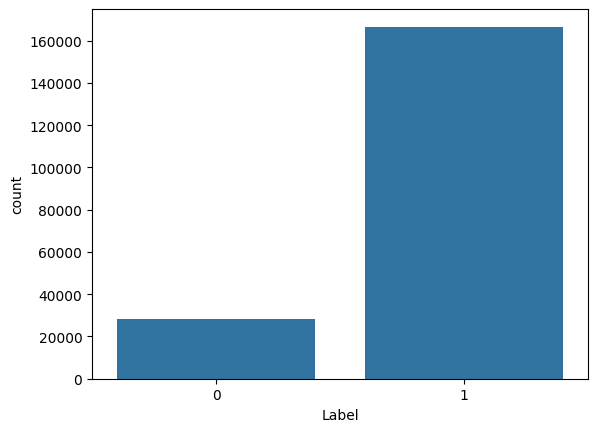

In [14]:
sns.barplot(x=df_train['Label'].value_counts().index, y=df_train['Label'].value_counts())

<Axes: xlabel='Sentiment', ylabel='count'>

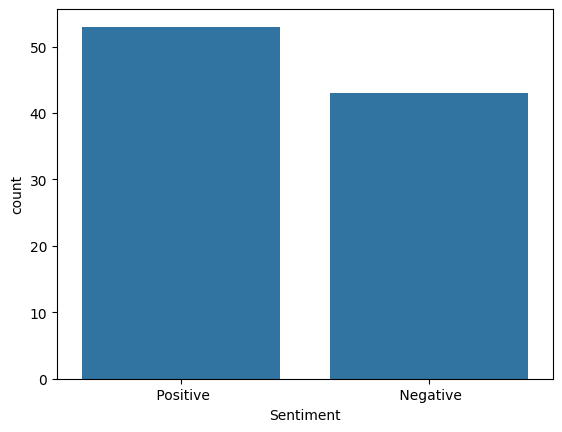

In [15]:
sns.barplot(x=df_test['Sentiment'].value_counts().index, y=df_test['Sentiment'].value_counts())

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [17]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
def preprocessing(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()

    text = re.sub(r'https?://\S+|www\.\S+|[^a-z\s]', '', text)

    words = text.split()

    return ' '.join(word for word in words if word not in stop_words)

In [19]:
df_train['clean_review'] = df_train['Cleaned_Summary'].apply(preprocessing)
df_test['clean_review'] = df_test['Text'].apply(preprocessing)

In [20]:
df_train['clean_review'].head()

,clean_review
0,great cooler excellent air flow price amazing ...
1,best budget fit cooler nice cooling
2,quality good power air decent
3,bad product fan
4,cooler really fantastic provides good air flow...


In [21]:
df_test['clean_review'].head()

,clean_review
1,love product
2,service terrible
3,movie amazing
4,im disappointed customer support
5,best meal life


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer

all_reviews = pd.concat([df_train['clean_review'], df_test['clean_review']])

In [23]:
top_words = 40000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(all_reviews)

In [24]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

df_train['sequences'] = tokenizer.texts_to_sequences(df_train['clean_review'])
df_test['sequences'] = tokenizer.texts_to_sequences(df_test['clean_review'])

Vocabulary size: 41312


In [29]:
print(df_test['Sentiment'].unique())

[' Positive' ' Negative']


In [30]:
df_test['Label'] = df_test['Sentiment'].map({' Positive': 1, ' Negative': 0})

In [31]:
df_test.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,clean_review,sequences,Label
1,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,love product,"[33, 2]",1
2,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,service terrible,"[49, 1784]",0
3,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,movie amazing,"[1239, 30]",1
4,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,im disappointed customer support,"[82, 207, 199, 167]",0
5,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,best meal life,"[5, 3412, 239]",1


In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sequence_length = 50

X_train = pad_sequences(df_train['sequences'], maxlen=sequence_length, padding='post')
y_train = np.array(df_train['Label'])

# Padding cho tập test
X_test = pad_sequences(df_test['sequences'], maxlen=sequence_length, padding='post')
y_test = np.array(df_test['Label'])

# Kiểm tra kết quả
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (194807, 50)
y_train shape: (194807,)
X_test shape: (96, 50)
y_test shape: (96,)


In [34]:
word2vec = api.load("word2vec-google-news-300")

embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]
print('complete')

[==================================================] 100.0% 1662.8/1662.8MB downloaded
complete


In [35]:
y_test[:5]

array([1, 0, 1, 0, 1])

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,GRU

# Xây dựng mô hình
hidden_dim = 128
def my_model():
    model = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  weights=[embedding_matrix],
                  trainable=False),
        Bidirectional(GRU(hidden_dim,
                          activation='tanh',
                          recurrent_activation='sigmoid',
                          return_sequences=True)),
        Dropout(0.3),
        Bidirectional(GRU(hidden_dim // 2,
                       activation='tanh',
                       recurrent_activation='sigmoid')),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

In [37]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [38]:
model = my_model()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      12,393,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,393,600 (47.28 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,393,600 (47.28 MB)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [40]:
epochs = 5
batch_size = 32

with tf.device('/device:GPU:0'):
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)



Epoch 1/5
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 101s 19ms/step - accuracy: 0.9376 - loss: 0.1783 - val_accuracy: 0.9514 - val_loss: 0.1399
Epoch 2/5
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 119s 15ms/step - accuracy: 0.9505 - loss: 0.1413 - val_accuracy: 0.9494 - val_loss: 0.1423
Epoch 3/5
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 75s 15ms/step - accuracy: 0.9536 - loss: 0.1333 - val_accuracy: 0.9526 - val_loss: 0.1352
Epoch 4/5
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - accuracy: 0.9573 - loss: 0.1241 - val_accuracy: 0.9520 - val_loss: 0.1383
Epoch 5/5
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 79s 15ms/step - accuracy: 0.9583 - loss: 0.1201 - val_accuracy: 0.9525 - val_loss: 0.1418


In [41]:

import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9948 - loss: 0.0394
Test Loss: 0.05506036803126335
Test Accuracy: 0.9895833134651184


In [42]:
def predict_sentiment(model, tokenizer, text, sequence_length=100):
    # Tiền xử lý văn bản
    text = preprocessing(text)
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=sequence_length, padding='post')

    # Dự đoán
    prediction = model.predict(padded_sequence)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"

# Ví dụ dự đoán
text = "I love this product, it's amazing!"
prediction = predict_sentiment(model, tokenizer, text)
print(f"Predicted Sentiment: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Predicted Sentiment: Positive


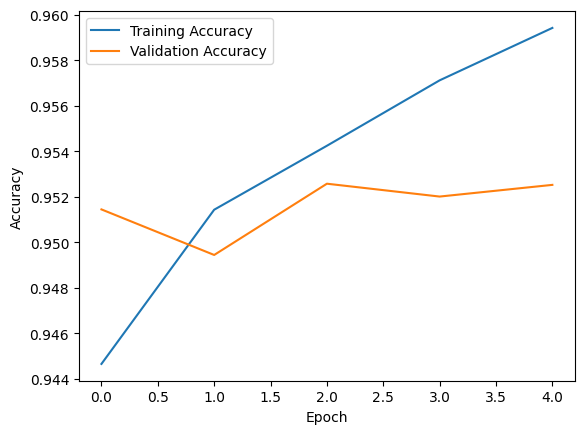

In [44]:
import matplotlib.pyplot as plt

# Lấy thông tin từ lịch sử huấn luyện
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [48]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


In [49]:
# ma tran sai sot
accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.9895833333333334


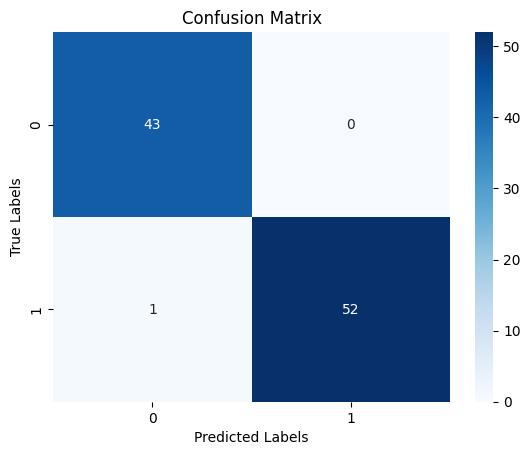

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()